## Homework 2 - Group 1
### Francisca Alliende & Yousef Abbar

#### Cleaning the Database

This section does not answer directly to any question, but has the objective of preparing the databases for the subsequent exercises.

In the long run we realized that this analysis was more than insufficient, but unfortunately we did not have time to redo it properly. 

We expose here, what we did for the month of June, repeating the same process for the other months. having as outputs the databases that you will see on the further exercises called: [01jan.csv, 02feb.csv,...,06jun.csv]

In [3]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [4]:
# Import the raw data corresponding to the month of June
jun = pd.read_csv('yellow_tripdata_2018-06.csv')

In [6]:
jun.describe()

,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
count,8.713831e+06,8.713831e+06,8.713831e+06,8.713831e+06,8.713831e+06,8.713831e+06,8.713831e+06,8.713831e+06,8.713831e+06,8.713831e+06,8.713831e+06,8.713831e+06,8.713831e+06,8.713831e+06
mean,1.575645e+00,1.597527e+00,3.008475e+00,1.045928e+00,1.624701e+02,1.607770e+02,1.314139e+00,1.325420e+01,3.363939e-01,4.970961e-01,1.906177e+00,3.631078e-01,2.995292e-01,1.666019e+01
std,4.950090e-01,1.243872e+00,3.858110e+00,5.161131e-01,6.676301e+01,7.046724e+01,4.854247e-01,1.214530e+01,4.658805e-01,4.213728e-02,2.664580e+00,1.807575e+00,1.613463e-02,1.491407e+01
min,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,-3.000000e+02,-5.000000e+00,-5.000000e-01,-1.000000e+02,-2.702000e+01,-3.000000e-01,-3.332500e+02
25%,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.140000e+02,1.070000e+02,1.000000e+00,6.500000e+00,0.000000e+00,5.000000e-01,0.000000e+00,0.000000e+00,3.000000e-01,8.750000e+00
50%,2.000000e+00,1.000000e+00,1.660000e+00,1.000000e+00,1.620000e+02,1.620000e+02,1.000000e+00,9.500000e+00,0.000000e+00,5.000000e-01,1.450000e+00,0.000000e+00,3.000000e-01,1.200000e+01
75%,2.000000e+00,2.000000e+00,3.100000e+00,1.000000e+00,2.330000e+02,2.330000e+02,2.000000e+00,1.500000e+01,5.000000e-01,5.000000e-01,2.460000e+00,0.000000e+00,3.000000e-01,1.830000e+01
max,4.000000e+00,9.000000e+00,8.331000e+02,9.900000e+01,2.650000e+02,2.650000e+02,4.000000e+00,8.018800e+03,5.300000e+00,6.300000e+00,4.115000e+02,9.105000e+02,1.000000e+00,8.019600e+03


In [7]:
# Delete irrelevant columns
drop_columns = ['VendorID', 'RatecodeID', "extra", "mta_tax", "tip_amount", "tolls_amount", "improvement_surcharge", "store_and_fwd_flag"]
jun.drop(drop_columns, inplace=True, axis=1)

In [ ]:
# Transform the variable tpep_pickup_datetime and tpep_dropoff_date time in datetime format
jun['tpep_pickup_datetime'] = pd.to_datetime(jun['tpep_pickup_datetime'])
jun['tpep_dropoff_datetime'] = pd.to_datetime(jun['tpep_dropoff_datetime'])

In [ ]:
# Create the variable Trip Duration and covert it in an integer
jun["Trip Duration"] = jun["tpep_dropoff_datetime"] - jun['tpep_pickup_datetime']
jun['Trip Duration Sec'] = jun['Trip Duration'].dt.total_seconds()
jun['Trip Duration Num'] = jun['Trip Duration Sec'].values.astype(np.int64)

In [15]:
# Drop all the Trip Duration that last less than a minute (make non sense, errors)
jun = jun[(jun["Trip Duration Num"] > 60)]

In [17]:
# According to Google maps, the longer trip is Staten Island - Manhattan, and in rush hour, you can spend 2 and a half hours
# In order to be conservative we are going to consider 4 hour trip as a reasonable trip 4 hours = 14.400 sec
jun = jun[(jun["Trip Duration Num"] < 14400)]

In [18]:
jun.describe()

,passenger_count,trip_distance,PULocationID,DOLocationID,payment_type,fare_amount,total_amount,Trip Duration,Trip Duration Sec,Trip Duration Num
count,8.614344e+06,8.614344e+06,8.614344e+06,8.614344e+06,8.614344e+06,8.614344e+06,8.614344e+06,8614344,8.614344e+06,8.614344e+06
mean,1.598767e+00,3.028523e+00,1.624094e+02,1.607161e+02,1.309732e+00,1.318120e+01,1.657901e+01,0 days 00:14:48.107120,8.881071e+02,8.881071e+02
std,1.244775e+00,3.854905e+00,6.670337e+01,7.043794e+01,4.802613e-01,1.172608e+01,1.449621e+01,0 days 00:12:11.353167,7.313532e+02,7.313532e+02
min,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,-3.000000e+02,-3.008000e+02,0 days 00:01:01,6.100000e+01,6.100000e+01
25%,1.000000e+00,1.000000e+00,1.140000e+02,1.070000e+02,1.000000e+00,6.500000e+00,8.760000e+00,0 days 00:06:47,4.070000e+02,4.070000e+02
50%,1.000000e+00,1.690000e+00,1.620000e+02,1.620000e+02,1.000000e+00,9.500000e+00,1.207000e+01,0 days 00:11:22,6.820000e+02,6.820000e+02
75%,2.000000e+00,3.110000e+00,2.330000e+02,2.330000e+02,2.000000e+00,1.500000e+01,1.830000e+01,0 days 00:18:43,1.123000e+03,1.123000e+03
max,9.000000e+00,8.331000e+02,2.650000e+02,2.650000e+02,4.000000e+00,8.018800e+03,8.019600e+03,0 days 03:59:18,1.435800e+04,1.435800e+04


In [19]:
# Deal with zero numbers..as o passengers and 0 distance does not make sense, we are going to use NaN values
# for not mess with our calculations
cols = ["passenger_count", "trip_distance"]
jun[cols] = jun[cols].replace({0:np.nan})

In [12]:
# Download the data base 
jun.to_csv('06jun.csv')

#### RQ1. In what period of the year Taxis are used more? Create a plot that, for each month, shows the average number of trips recorded each day. Due to the differences among New York zones, we want to visualize the same information for each boroughs. Do you notice any difference among them? Provide comments and plausible explanations about what you observe (e.g.: what is the month with the highest daily average?).

####  RQ2. What are the time slots with more passengers? Set your own time slots and discover which are those when Taxis drive the highest number of passengers overall New York and repeat the analysis for each borough. Provide the results through a visualization and comment them.

In [1]:
# Import the libaries needed
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [2]:
# Import all the data bases and select only the columns that I need for the exercise

In [3]:
cols_of_interest = ['tpep_pickup_datetime', 'passenger_count', 'PULocationID']

In [4]:
jan = pd.read_csv('01jan.csv')
jan = jan[cols_of_interest]

In [5]:
feb = pd.read_csv('02feb.csv')
feb = feb[cols_of_interest]

In [6]:
mar = pd.read_csv('03mar.csv')
mar = mar[cols_of_interest]

In [7]:
apr = pd.read_csv('04apr.csv')
apr = apr[cols_of_interest]

In [8]:
may = pd.read_csv('05may.csv')
may = may[cols_of_interest]

In [9]:
jun = pd.read_csv('06jun.csv')
jun  = jun[cols_of_interest]

In [10]:
# Concatenate all this data bases in one
frames = [jan, feb, mar, apr, may, jun]
RQ2 = pd.concat(frames)

To be able to perform this analysis, we need first to create variable that represent the time when a taxi is requested. In our case we are going to time slots from one hour.

Let's analyze the data types of our variables.

In [11]:
RQ2.dtypes

tpep_pickup_datetime     object
passenger_count         float64
PULocationID              int64
dtype: object

With the aim of creating the variable "Hour", first we are going to transform the variable tpep_pickup_datetime in a datetime format, and then we are going to extract only the hour, truncating the minutes and that is going to be our time slot. 

In [12]:
# Transform the variable tpep_pickup_datetime in datetime format
RQ2['tpep_pickup_datetime'] = pd.to_datetime(RQ2['tpep_pickup_datetime'])

# Create the variable hour as a new column
RQ2["Hour"] = RQ2.tpep_pickup_datetime.dt.hour

In [13]:
# Does everything looks normal?
RQ2.head()

,tpep_pickup_datetime,passenger_count,PULocationID,Hour
0,2018-01-01 00:21:05,1.0,41,0
1,2018-01-01 00:44:55,1.0,239,0
2,2018-01-01 00:08:26,2.0,262,0
3,2018-01-01 00:20:22,1.0,140,0
4,2018-01-01 00:09:18,2.0,246,0


In [14]:
RQ2.describe()

,passenger_count,PULocationID,Hour
count,4.584210e+07,4.617839e+07,4.617839e+07
mean,1.612893e+00,1.630845e+02,1.379097e+01
std,1.244851e+00,6.651919e+01,6.129612e+00
min,0.000000e+00,1.000000e+00,0.000000e+00
25%,1.000000e+00,1.140000e+02,9.000000e+00
50%,1.000000e+00,1.620000e+02,1.400000e+01
75%,2.000000e+00,2.330000e+02,1.900000e+01
max,1.920000e+02,2.650000e+02,2.300000e+01


The "Hour" variable looks normal, but the "passenger_count" variable has values equal to zero, which does not make sense. Let's assume they are errors convert them into NaN values in order to not to alter the results

In [15]:
RQ2["passenger_count"] = RQ2["passenger_count"].replace({0:np.nan})

In [16]:
# Does everything looks normal?
RQ2.describe()

,passenger_count,PULocationID,Hour
count,4.583326e+07,4.617839e+07,4.617839e+07
mean,1.613204e+00,1.630845e+02,1.379097e+01
std,1.244770e+00,6.651919e+01,6.129612e+00
min,1.000000e+00,1.000000e+00,0.000000e+00
25%,1.000000e+00,1.140000e+02,9.000000e+00
50%,1.000000e+00,1.620000e+02,1.400000e+01
75%,2.000000e+00,2.330000e+02,1.900000e+01
max,1.920000e+02,2.650000e+02,2.300000e+01


Now that we are satisfied with how all our variables looks like, we will proceed to graph the number of passengers per hour averall Manhattan.

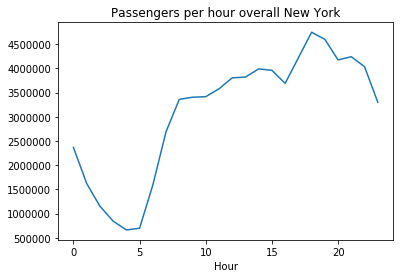

In [17]:
# Total number of passengers per hour overall New York
passengers_per_hour = RQ2.groupby(["Hour"])['passenger_count'].sum()
passengers_per_hour.plot(title="Passengers per hour overall New York")

We can clearly see that the hours of the day in which there are more people traveling by taxi in New York are between 9 in the morning and 9 in the evening, having a maximum around 6 in the evening, greatly reducing its amount between 3 and 5 d in the early morning.

This makes sense, since people probably use taxis to get around the city during the day and especially at the end of the workday.

Following, in order to complete the analysis between the boroughs, we will import the database "taxi_zone_lookup", and merge it with our current database by the variable "PULocationID", since we are using the pick up datetime of the time slots.

In [18]:
# Import the taxi_zone_lookup data base
taxi_zone_data = pd.read_csv('taxi_zone_lookup.csv')

# Rename the variable PULocationID, to be able to make the merging
RQ2 = RQ2.rename(columns={'PULocationID': 'LocationID'})

# Merge them and select only the columns of interest
RQ2 = pd.merge(RQ2, taxi_zone_data, on="LocationID")
cols_of_interest = ['Hour', 'passenger_count', 'Borough']
RQ2 = RQ2[cols_of_interest]

Now we are ready to compute the number of passengers per borough. 

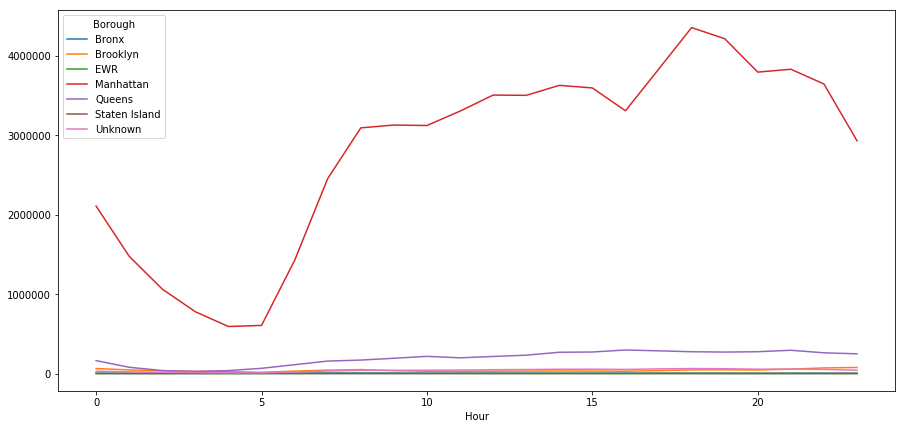

In [20]:
# Plot of the total number of passangers among New York, by borough
fig, ax = plt.subplots(figsize=(15,7))
RQ2.groupby(['Hour','Borough']).sum()['passenger_count'].unstack().plot(ax=ax)

As we can see in the plot, we have some data with Unknown borough, in order of doing so that they do not hinder the analysis, we are going to not consider them. 

In [22]:
RQ2 = RQ2[RQ2['Borough'].isin(['Bronx', 'Brooklyn', "EWR", "Manhattan", "Queens", "Staten Island"])]

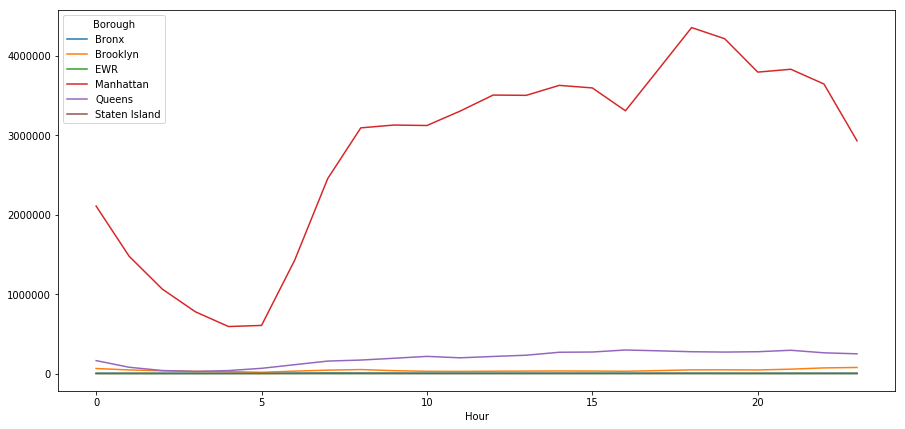

In [23]:
# Plot of the total number of passangers among New York, by borough
fig, ax = plt.subplots(figsize=(15,7))
RQ2.groupby(['Hour','Borough']).sum()['passenger_count'].unstack().plot(ax=ax)

As we can see in the graph, Manhatan has an influx of passengers much larger than the other boroughs, this makes sense because yellow taxis usually leave New York and we are also using the data of pick up both to determine the borough, as well as the time.

Note also that Manhattan behaves very similarly to the aggregate, which makes sense because most of the data correspond to Manhattan.

To finish the analysis we are going to repeat the previous graph, but without Manhattan, to see better how other neighborhoods behave.

In [24]:
RQ2 = RQ2[RQ2['Borough'].isin(['Bronx', 'Brooklyn', "EWR", "Queens", "Staten Island"])]

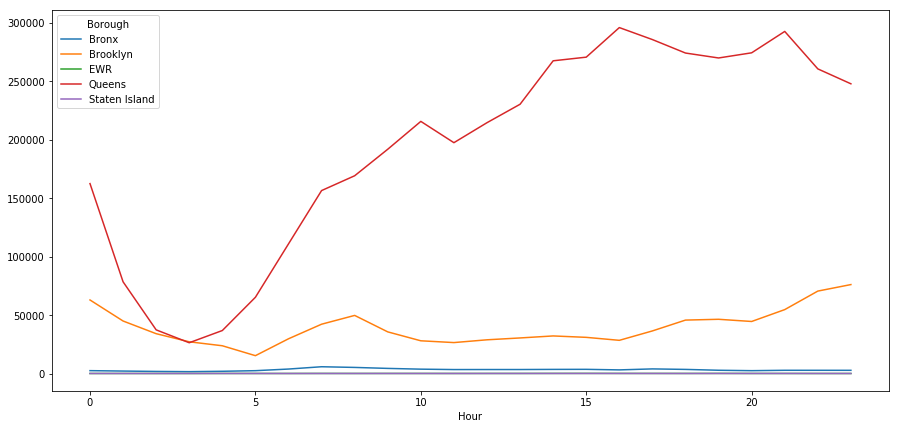

In [25]:
# Plot of the total number of passangers among New York, by borough
fig, ax = plt.subplots(figsize=(15,7))
RQ2.groupby(['Hour','Borough']).sum()['passenger_count'].unstack().plot(ax=ax)

Looking at this plot, we can see that Queens is the second borough with more passengers, and Brooklyn comes in third, with also some picks on the evenings and bottoms in the early morning.

The demand of EWR taxis, on the other hand, it looks more flat, and this makes sense because the number of people that use a taxi for going to the Aerport it is not so sensitive to the hours of the day.

#### RQ3. Do the all trips last the same? Let's put our attention on the distribution of trip's duration. Provide a plot for it and comment what you see. Run this analysis for NYC and for each borough (and obviously comment the results!).

In [1]:
# Import all the libraries needed
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [ ]:
# Import all the data bases and select only the columns that I need for the exercise

In [2]:
cols_of_interest = ['tpep_pickup_datetime', 'tpep_dropoff_datetime', "PULocationID"]

In [3]:
jan = pd.read_csv('01jan.csv')
jan = jan[cols_of_interest]

In [4]:
feb = pd.read_csv('02feb.csv')
feb = feb[cols_of_interest]

In [5]:
mar = pd.read_csv('03mar.csv')
mar = mar[cols_of_interest]

In [6]:
apr = pd.read_csv('04apr.csv')
apr = apr[cols_of_interest]

In [7]:
may = pd.read_csv('05may.csv')
may = may[cols_of_interest]

In [8]:
jun = pd.read_csv('06jun.csv')
jun  = jun[cols_of_interest]

In [9]:
# Concatenate all the data bases in one
frames = [jan, feb, mar, apr, may, jun]
RQ3 = pd.concat(frames)

With the aim of answering this question, we need to create the variable Trip Duration.

In order to do that, let's consult the data types of our current variables.

In [11]:
RQ3.dtypes

tpep_pickup_datetime     object
tpep_dropoff_datetime    object
PULocationID              int64
dtype: object

First of all, we need to convert the variables 'tpep_pickup_datetime' and 'tpep_dropoff_datetime' in datatime format, after that I can easly sustract both variables and compute the Trip Duration. 

In [12]:
# Transform the variable tpep_pickup_datetime in datetime format
RQ3['tpep_pickup_datetime'] = pd.to_datetime(RQ3['tpep_pickup_datetime'])

# Transform the variable tpep_dropoff_datetime in datetime format
RQ3['tpep_dropoff_datetime'] = pd.to_datetime(RQ3['tpep_dropoff_datetime'])

# Create the variable Trip Duration 
RQ3["Trip Duration"] = RQ3["tpep_dropoff_datetime"] - RQ3['tpep_pickup_datetime']

In [13]:
# Does everything looks normal?
RQ3.head()

,tpep_pickup_datetime,tpep_dropoff_datetime,PULocationID,Trip Duration
0,2018-01-01 00:21:05,2018-01-01 00:24:23,41,00:03:18
1,2018-01-01 00:44:55,2018-01-01 01:03:05,239,00:18:10
2,2018-01-01 00:08:26,2018-01-01 00:14:21,262,00:05:55
3,2018-01-01 00:20:22,2018-01-01 00:52:51,140,00:32:29
4,2018-01-01 00:09:18,2018-01-01 00:27:06,246,00:17:48


In [14]:
RQ3.describe()

,PULocationID,Trip Duration
count,4.617839e+07,46178390
mean,1.630845e+02,0 days 00:14:13.965415
std,6.651919e+01,0 days 00:11:36.429721
min,1.000000e+00,0 days 00:01:01
25%,1.140000e+02,0 days 00:06:36
50%,1.620000e+02,0 days 00:11:00
75%,2.330000e+02,0 days 00:18:02
max,2.650000e+02,0 days 03:59:53


Our new variable, looks normal, but the problem is that we can't plot an histogram of a datatype variable. Because of that, we are going to transform our new variable "Trip Duration" in a new variable that express the duration of the trip in seconds and then, transform it in an integer, having as a result the variable call "Trip Duration Num" that corresponds a integer with the quantity of second that the trip last.

In [15]:
# Transform the variable Trip Duration in a variable that has all the seconds of trip duration
RQ3['Trip Duration Sec'] = RQ3['Trip Duration'].dt.total_seconds()
# Transform the new variable in integer data type
RQ3['Trip Duration Num'] = RQ3['Trip Duration Sec'].values.astype(np.int64)

In [16]:
# Does everything looks normal?
RQ3.head()

,tpep_pickup_datetime,tpep_dropoff_datetime,PULocationID,Trip Duration,Trip Duration Sec,Trip Duration Num
0,2018-01-01 00:21:05,2018-01-01 00:24:23,41,00:03:18,198.0,198
1,2018-01-01 00:44:55,2018-01-01 01:03:05,239,00:18:10,1090.0,1090
2,2018-01-01 00:08:26,2018-01-01 00:14:21,262,00:05:55,355.0,355
3,2018-01-01 00:20:22,2018-01-01 00:52:51,140,00:32:29,1949.0,1949
4,2018-01-01 00:09:18,2018-01-01 00:27:06,246,00:17:48,1068.0,1068


In [17]:
RQ3.describe()

,PULocationID,Trip Duration,Trip Duration Sec,Trip Duration Num
count,4.617839e+07,46178390,4.617839e+07,4.617839e+07
mean,1.630845e+02,0 days 00:14:13.965415,8.539654e+02,8.539654e+02
std,6.651919e+01,0 days 00:11:36.429721,6.964297e+02,6.964297e+02
min,1.000000e+00,0 days 00:01:01,6.100000e+01,6.100000e+01
25%,1.140000e+02,0 days 00:06:36,3.960000e+02,3.960000e+02
50%,1.620000e+02,0 days 00:11:00,6.600000e+02,6.600000e+02
75%,2.330000e+02,0 days 00:18:02,1.082000e+03,1.082000e+03
max,2.650000e+02,0 days 03:59:53,1.439300e+04,1.439300e+04


Now we are ready to graph the distribution of trip's duration

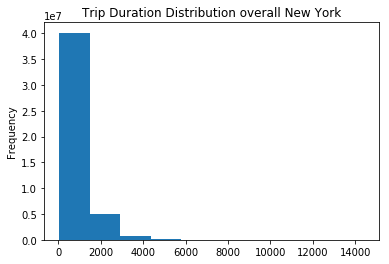

In [22]:
RQ3['Trip Duration Num'].plot(kind='hist', title="Trip Duration Distribution overall New York")

In [34]:
RQ3['Trip Duration Num'].describe()

count    4.617839e+07
mean     8.539654e+02
std      6.964297e+02
min      6.100000e+01
25%      3.960000e+02
50%      6.600000e+02
75%      1.082000e+03
max      1.439300e+04
Name: Trip Duration Num, dtype: float64

Looking at the plot we can see that almost every trip is concentrate in 2.000 seconds or less (30 minutes or less). This result makes sense, because is expected that a taxi trip last around 30 minutes, we can see that we have outsiders of trips that lasts one hour or three, but as we expected is not the average behavior. 

In order to extend the analysis to each borough, we need to import the "taxi_zone_lookup" database, and merge it with our current data base. We are going to merge it by the variable PULocationID in order to be consistent with the previous exercises.

In [19]:
# Import the taxi_zone_lookup data base
taxi_zone_data = pd.read_csv('taxi_zone_lookup.csv')
# Rename PULocationID
RQ3 = RQ3.rename(columns={'PULocationID': 'LocationID'})
# Merge the data bases
RQ3 = pd.merge(RQ3, taxi_zone_data, on="LocationID")
# Select only the columns of interest
cols_of_interest = ["Trip Duration Num",'Borough']
RQ3 = RQ3[cols_of_interest]

Following, it exposed, the plots of the distribution of trip's duration for each borough.

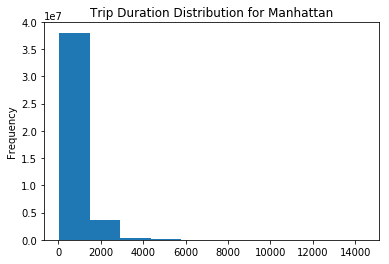

In [21]:
Manhattan = RQ3[RQ3['Borough'].isin(["Manhattan"])]
Manhattan['Trip Duration Num'].plot(kind="hist", title="Trip Duration Distribution for Manhattan")

In [28]:
Manhattan['Trip Duration Num'].describe()

count    4.201973e+07
mean     7.746417e+02
std      5.785484e+02
min      6.100000e+01
25%      3.840000e+02
50%      6.290000e+02
75%      9.980000e+02
max      1.439300e+04
Name: Trip Duration Num, dtype: float64

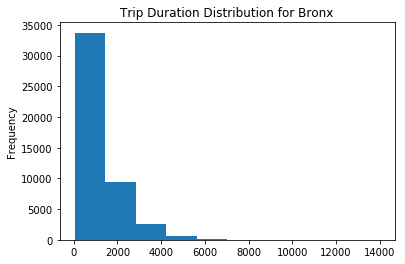

In [23]:
Bronx = RQ3[RQ3['Borough'].isin(["Bronx"])]
Bronx['Trip Duration Num'].plot(kind="hist", title="Trip Duration Distribution for Bronx")

In [29]:
Bronx['Trip Duration Num'].describe()

count    46595.000000
mean      1180.920120
std       1034.146307
min         61.000000
25%        472.000000
50%        870.000000
75%       1558.000000
max      13980.000000
Name: Trip Duration Num, dtype: float64

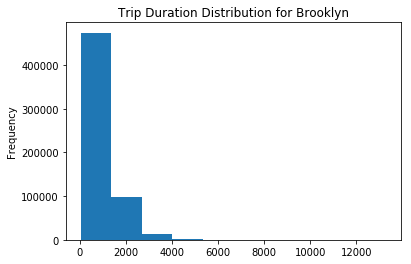

In [24]:
Brooklyn = RQ3[RQ3['Borough'].isin(["Brooklyn"])]
Brooklyn['Trip Duration Num'].plot(kind="hist", title="Trip Duration Distribution for Brooklyn")

In [30]:
Brooklyn['Trip Duration Num'].describe()

count    589488.000000
mean        930.331201
std         718.226217
min          61.000000
25%         425.000000
50%         750.000000
75%        1220.000000
max       13259.000000
Name: Trip Duration Num, dtype: float64

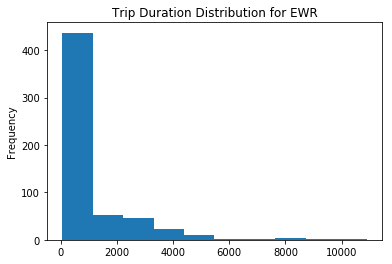

In [25]:
EWR = RQ3[RQ3['Borough'].isin(["EWR"])]
EWR['Trip Duration Num'].plot(kind="hist", title="Trip Duration Distribution for EWR")

In [31]:
EWR['Trip Duration Num'].describe()

count      576.000000
mean       856.979167
std       1473.642761
min         61.000000
25%         83.000000
50%        135.000000
75%       1054.500000
max      10892.000000
Name: Trip Duration Num, dtype: float64

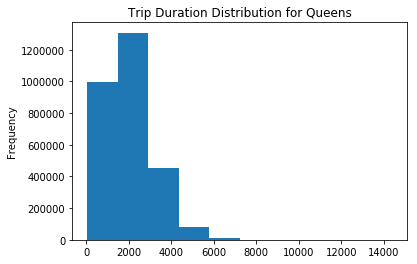

In [26]:
Queens = RQ3[RQ3['Borough'].isin(["Queens"])]
Queens['Trip Duration Num'].plot(kind="hist", title="Trip Duration Distribution for Queens")

In [32]:
Queens['Trip Duration Num'].describe()

count    2.844495e+06
mean     2.008748e+03
std      1.123303e+03
min      6.100000e+01
25%      1.214000e+03
50%      1.881000e+03
75%      2.665000e+03
max      1.437900e+04
Name: Trip Duration Num, dtype: float64

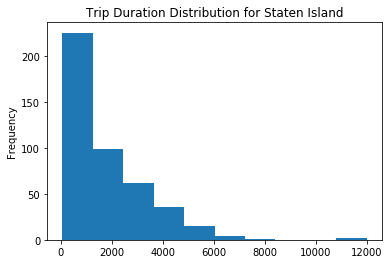

In [27]:
Staten_Island = RQ3[RQ3['Borough'].isin(["Staten Island"])]
Staten_Island['Trip Duration Num'].plot(kind="hist", title="Trip Duration Distribution for Staten Island")

In [33]:
Staten_Island['Trip Duration Num'].describe()

count      444.000000
mean      1740.281532
std       1650.796698
min         61.000000
25%        498.250000
50%       1201.500000
75%       2575.750000
max      11990.000000
Name: Trip Duration Num, dtype: float64

The distribution of Manhattan looks a lot like the overall New York, probably because most of the trips are from New York, the mean is 774 second = 13 minutes and we can see on the plot that almost all the trips last less than 2.000 seconds = 33 minutes. 

All other boroughs, which are not Manhattan, have more frequent on longer trips. This makes sense because most of the yellow taxis travel from Manhattan, so with high probability a yellow taxi that is taken in another borough, goes to Manhattan, which translates into longer trips than those that are made only within from Manhattan. 

The other boroughs, also have the factor that being farther from Manhattan, are more sensitive to traffic and the different roads that taxis can be taken, thus explaining the greater variability that other neighborhoods have, comparing them with Manhattan and there for with the whole distribution.

#### RQ4. What is the most common way of payments? Discover the way payments are executed in each borough and visualize the number of payments for any possible means. Then run the Chi-squared test to see whether the method of payment is correlated to the borough. Then, comment the results.

#### RQ5. Does a long distance correlate with the duration of the trip on average? Make a plot that show the dependence between distance and duration of the trip. Then compute the Pearson Coefficient, is it significant? Comment the results you obtain.

In [1]:
# Import libabries
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [2]:
# Import all the data bases and select only the columns that I need for the exercise
cols_of_interest = ['trip_distance', 'Trip Duration', "Trip Duration Num"]

In [3]:
jan = pd.read_csv('01jan.csv')
jan = jan[cols_of_interest]

In [4]:
feb = pd.read_csv('02feb.csv')
feb = feb[cols_of_interest]

In [5]:
mar = pd.read_csv('03mar.csv')
mar = mar[cols_of_interest]

In [6]:
apr = pd.read_csv('04apr.csv')
apr = apr[cols_of_interest]

In [7]:
may = pd.read_csv('05may.csv')
may = may[cols_of_interest]

In [8]:
jun = pd.read_csv('06jun.csv')
jun  = jun[cols_of_interest]

In [10]:
# Concatenate all this data bases in one
frames = [jan, feb, mar, apr, may, jun]
RQ5 = pd.concat(frames)

In [11]:
# Does everything looks normal?
RQ5.head()

,trip_distance,Trip Duration,Trip Duration Num
0,0.5,0 days 00:03:18.000000000,198
1,2.7,0 days 00:18:10.000000000,1090
2,0.8,0 days 00:05:55.000000000,355
3,10.2,0 days 00:32:29.000000000,1949
4,2.5,0 days 00:17:48.000000000,1068


In [12]:
RQ5.describe()

,trip_distance,Trip Duration Num
count,4.612010e+07,4.617839e+07
mean,2.940129e+00,8.539654e+02
std,3.765704e+00,6.964297e+02
min,0.000000e+00,6.100000e+01
25%,9.900000e-01,3.960000e+02
50%,1.610000e+00,6.600000e+02
75%,3.000000e+00,1.082000e+03
max,1.061200e+03,1.439300e+04


As we can see, we have some trip_distance = 0 values, that do not make sense, we assume they are errors,  to avoid problems in the calculations we are going to transform them into NaN values.

In [13]:
RQ5["trip_distance"] = RQ5["trip_distance"].replace({0:np.nan})

In [14]:
# Does everything looks normal?
RQ5.describe()

,trip_distance,Trip Duration Num
count,4.611799e+07,4.617839e+07
mean,2.940263e+00,8.539654e+02
std,3.765738e+00,6.964297e+02
min,1.000000e-02,6.100000e+01
25%,9.900000e-01,3.960000e+02
50%,1.610000e+00,6.600000e+02
75%,3.000000e+00,1.082000e+03
max,1.061200e+03,1.439300e+04


Now we are ready to proceed and plot the relationship between the duration and the distance of the trip. 

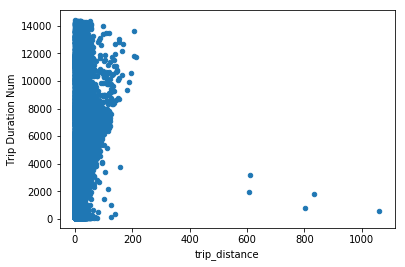

In [15]:
# Plot of the relationship between duration trip and trip distance
RQ5.plot(x='trip_distance', y='Trip Duration Num', kind='scatter')

We can see a a subtle trend, but we clearly have some outsiders that do not let us see clearly how most of the data behaves. In order to see in a better way this relationship, we will eliminate the data with distance greater than 200.

In [16]:
# Drop the rows with distance > 200
RQ5 = RQ5[(RQ5["trip_distance"] < 200)]

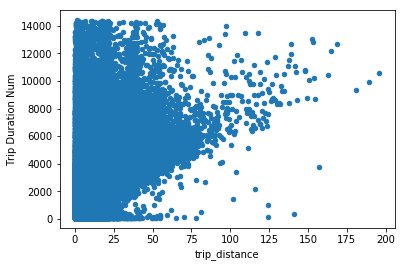

In [17]:
# Plot of the relationship between duration trip and trip distance, without the outsiders
RQ5.plot(x='trip_distance', y='Trip Duration Num', kind='scatter')

Now we can see that there is a relationship between long distances and large duration trips as expected. Let's compute the Pearson Coeficient in order to understand better this correlation.

In [18]:
RQ5.corr(method='pearson', min_periods=1)

,trip_distance,Trip Duration Num
trip_distance,1.000000,0.800506
Trip Duration Num,0.800506,1.000000


To put this results in context, let's remember that the coefficient of Pearson Coeficient is a measure of the linear correlation between two variables, which has the following characteristics:
* It has a value between +1 and −1
* 1 means total positive linear correlation, 
* 0 means no linear correlation, and
* −1 means total negative linear correlation.

With this information we can interpret, that the variables trip distance and trip duration have a strong positive linear correlation.

#### CRQ1. Does the fare for mile change across NY's borough? We want to discover whether the expenses of a user that enjoys Taxis in one zone is different from those that uses it in another one.

In [40]:
# Import the libraries we are going to use
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from scipy.stats import ttest_ind
from itertools import combinations 

In [3]:
# Select the columns of interest for this exercise
cols_of_interest = ["fare_amount", "trip_distance", "Trip Duration Num", "DOLocationID", "PULocationID"]

In [4]:
# Import all the data bases, selecting only the columns of interest
jan = pd.read_csv('01jan.csv')
jan = jan[cols_of_interest]

In [5]:
feb = pd.read_csv('02feb.csv')
feb = feb[cols_of_interest]

In [6]:
mar = pd.read_csv('03mar.csv')
mar = mar[cols_of_interest]

In [7]:
apr = pd.read_csv('04apr.csv')
apr = apr[cols_of_interest]

In [8]:
may = pd.read_csv('05may.csv')
may = may[cols_of_interest]

In [9]:
jun = pd.read_csv('06jun.csv')
jun  = jun[cols_of_interest]

In [11]:
# Concatenate them 
frames = [jan, feb, mar, apr, may, jun]
CRQ1 = pd.concat(frames)

Now, we are ready to create a new variable: "price_per_mile", that consist on the ratio between the "fare_amount" and "trip distance".
Let's remember the definitions of the variables:
- fare_amount: the time-and-distance fare calculated by the meter.
- trip_distance: the elapsed trip distance in miles reported by the taximeter.

In [12]:
CRQ1["price_per_mile"] = CRQ1["fare_amount"] / CRQ1['trip_distance']

Let's see how our new variable looks like

In [14]:
CRQ1.describe()

,fare_amount,trip_distance,Trip Duration Num,DOLocationID,PULocationID,price_per_mile
count,4.617839e+07,4.612010e+07,4.617839e+07,4.617839e+07,4.617839e+07,4.612004e+07
mean,1.280463e+01,2.940129e+00,8.539654e+02,1.613742e+02,1.630845e+02,NaN
std,4.464127e+01,3.765704e+00,6.964297e+02,7.038153e+01,6.651919e+01,NaN
min,-4.850000e+02,0.000000e+00,6.100000e+01,1.000000e+00,1.000000e+00,-inf
25%,6.500000e+00,9.900000e-01,3.960000e+02,1.070000e+02,1.140000e+02,4.324324e+00
50%,9.000000e+00,1.610000e+00,6.600000e+02,1.620000e+02,1.620000e+02,5.500000e+00
75%,1.450000e+01,3.000000e+00,1.082000e+03,2.330000e+02,2.330000e+02,7.000000e+00
max,2.147484e+05,1.061200e+03,1.439300e+04,2.650000e+02,2.650000e+02,inf


We can see appreciate that we did a very bad job cleaning the database in the first part of the homework, but unfortunately we do not have time to start all over again, hereby we will have to decide what to do with the values that do not make sense, at this point.

In [15]:
# Infinite numbers that not make sense, so we are going to replace them with NaN
CRQ1 = CRQ1.replace([np.inf, -np.inf], np.nan)

In [16]:
# For simplicity we are going to delete all the null values in the columns of interest
CRQ1 = CRQ1[pd.notnull(CRQ1['fare_amount'])]
CRQ1 = CRQ1[pd.notnull(CRQ1['trip_distance'])]
CRQ1 = CRQ1[pd.notnull(CRQ1['price_per_mile'])]

In [17]:
CRQ1.describe()

,fare_amount,trip_distance,Trip Duration Num,DOLocationID,PULocationID,price_per_mile
count,4.611799e+07,4.611799e+07,4.611799e+07,4.611799e+07,4.611799e+07,4.611799e+07
mean,1.280126e+01,2.940263e+00,8.543924e+02,1.613685e+02,1.630773e+02,6.187190e+00
std,4.464903e+01,3.765738e+00,6.954279e+02,7.038169e+01,6.651453e+01,5.183960e+01
min,-4.850000e+02,1.000000e-02,6.100000e+01,1.000000e+00,1.000000e+00,-4.850000e+04
25%,6.500000e+00,9.900000e-01,3.960000e+02,1.070000e+02,1.140000e+02,4.324324e+00
50%,9.500000e+00,1.610000e+00,6.610000e+02,1.620000e+02,1.620000e+02,5.500000e+00
75%,1.450000e+01,3.000000e+00,1.083000e+03,2.330000e+02,2.330000e+02,7.000000e+00
max,2.147484e+05,1.061200e+03,1.439300e+04,2.650000e+02,2.650000e+02,2.500069e+05


We still have data that looks like errors, like negative amounts of "fare_amount", as we know, it is a dollar amount, which can not be negative. And we also have "trip_distance", of 0.01 milles. We are going to assume that every distance under 500 mtrs = 0.310686, is an error, it is almost impossible for someone to take a taxi for a distance less than that.

In [18]:
# Fare amount greater than zero
CRQ1 = CRQ1[(CRQ1["fare_amount"] > 0)]

# Trip distance greater than 500 mtrs = 0,310686 milles
CRQ1 = CRQ1[(CRQ1["trip_distance"] > 0.310686)]

In [19]:
CRQ1.describe()

,fare_amount,trip_distance,Trip Duration Num,DOLocationID,PULocationID,price_per_mile
count,4.545628e+07,4.545628e+07,4.545628e+07,4.545628e+07,4.545628e+07,4.545628e+07
mean,1.292708e+01,2.978670e+00,8.640012e+02,1.612488e+02,1.629898e+02,5.870627e+00
std,4.495085e+01,3.777055e+00,6.951795e+02,7.042186e+01,6.650013e+01,4.358419e+01
min,1.000000e-02,3.200000e-01,6.100000e+01,1.000000e+00,1.000000e+00,6.697924e-05
25%,6.500000e+00,1.000000e+00,4.060000e+02,1.070000e+02,1.140000e+02,4.310345e+00
50%,9.500000e+00,1.650000e+00,6.690000e+02,1.620000e+02,1.620000e+02,5.468750e+00
75%,1.450000e+01,3.070000e+00,1.092000e+03,2.330000e+02,2.330000e+02,6.906077e+00
max,2.147484e+05,1.061200e+03,1.439300e+04,2.650000e+02,2.650000e+02,2.500069e+05


We still have strange values, in this case, exorbitantly high values for a taxi fare per mile. In order to understand better  what are these values, we are going to sort the values by tha variable "price_per_mile", and then look at the tail values. We will also plot the variable in a histogram, to analyze the outsiders

In [20]:
CRQ1 = CRQ1.sort_values(["price_per_mile"])

In [21]:
CRQ1.tail()

,fare_amount,trip_distance,Trip Duration Num,DOLocationID,PULocationID,price_per_mile
6134419,8016.50,6.0,1126,264,264,1336.083333
43601,4009.50,2.1,697,230,237,1909.285714
3025173,3007.00,1.2,488,142,141,2505.833333
8977642,214748.44,1.4,585,4,107,153391.742857
1896428,200005.50,0.8,265,237,142,250006.875000


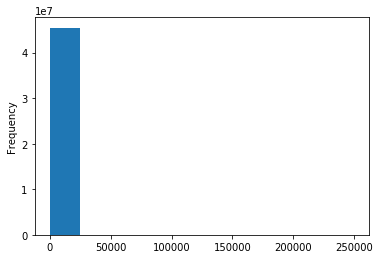

In [22]:
CRQ1['price_per_mile'].plot(kind='hist')

Based on what was seen above, we decided to assume that values with a "price_per_mille" higher than 30 dollars per mile are computation errors.

In [23]:
# Select only the rows with price per mile smaller that 30
CRQ1 = CRQ1[(CRQ1["price_per_mile"] < 30)]

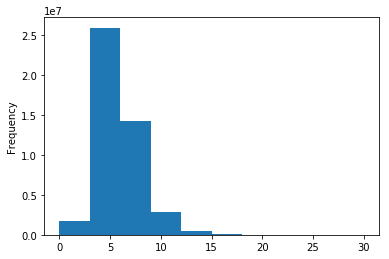

In [24]:
CRQ1['price_per_mile'].plot(kind='hist')

At this point we are more or less satisfied with how the variable "price_per_mile" looks like. So, now we are going to import the "taxi_zone_lookup", merge it with our data base, using the column PULocationID (TLC Taxi Zone in which the taximeter was engaged), in order to analyze, the price per mile by borough.  

In [26]:
# Import the taxi_zone_lookup data base
taxi_zone_data = pd.read_csv('taxi_zone_lookup.csv')

# Change the name of the variable PULocationID
CRQ1 = CRQ1.rename(columns={'PULocationID': 'LocationID'})

# Merge both databases by LocationID = PULocationID
CRQ1 = pd.merge(CRQ1, taxi_zone_data, on="LocationID")

# Select only the columns needed on this exercise
cols_of_interest = ['fare_amount', 'trip_distance', 'Trip Duration Num', "price_per_mile", "Borough"]
CRQ1 = CRQ1[cols_of_interest]

# Eliminate Borough = Unknown
CRQ1 = CRQ1[CRQ1['Borough'].isin(['Bronx', 'Brooklyn', "EWR", "Manhattan", "Queens", "Staten Island"])]

Following, it exposed, the data corresponding to: mean, standard deviation and histogram of the distribution, in that order, for each borough. 

Manhattan
Mean:  6.017286714972228
Standard deviation:  2.141097972578411


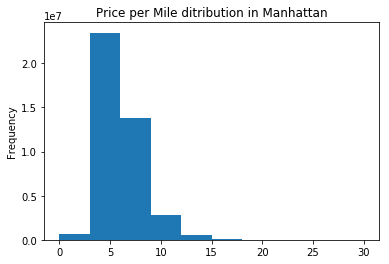

In [33]:
# I'm sure it is a better way to compute this, with a for loop, and groupby, but I was not able to figure that out in time.
# Manhattan
print("Manhattan")
Manhattan = CRQ1[CRQ1['Borough'].isin(["Manhattan"])]
print("Mean: ", Manhattan["price_per_mile"].mean())
print("Standard deviation: ", Manhattan["price_per_mile"].std())
Manhattan['price_per_mile'].plot(kind='hist', title="Price per Mile ditribution in Manhattan")

Bronx
Mean:  4.756491953420972
Standard deviation:  1.8789249617093802


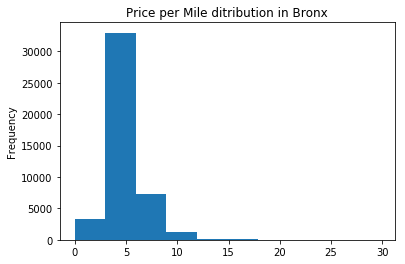

In [34]:
# Bronx
print("Bronx")
Bronx = CRQ1[CRQ1['Borough'].isin(["Bronx"])]
print("Mean: ",Bronx["price_per_mile"].mean())
print("Standard deviation: ", Bronx["price_per_mile"].std())
Bronx['price_per_mile'].plot(kind='hist', title="Price per Mile ditribution in Bronx")

Staten Island
Mean:  4.107593230727787
Standard deviation:  2.6526968082449773


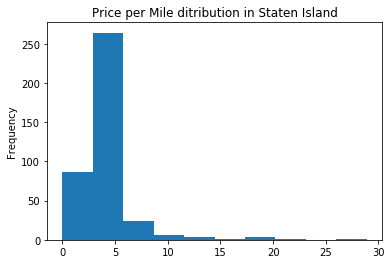

In [35]:
# Staten Island
print("Staten Island")
Staten_Island = CRQ1[CRQ1['Borough'].isin(["Staten Island"])]
print("Mean: ", Staten_Island["price_per_mile"].mean())
print("Standard deviation: ",Staten_Island["price_per_mile"].std())
Staten_Island['price_per_mile'].plot(kind='hist', title="Price per Mile ditribution in Staten Island")

Queens
Mean:  3.468360627118219
Standard deviation:  1.3213959367386856


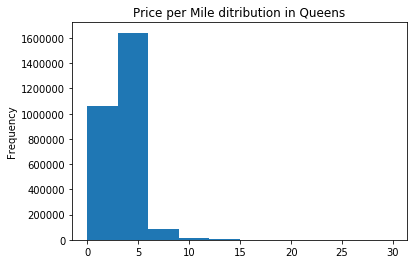

In [36]:
# Queens
print("Queens")
Queens = CRQ1[CRQ1['Borough'].isin(["Queens"])]
print("Mean: ", Queens["price_per_mile"].mean())
print("Standard deviation: ",Queens["price_per_mile"].std())
Queens['price_per_mile'].plot(kind='hist', title="Price per Mile ditribution in Queens")

EWR
Mean:  4.551425060438014
Standard deviation:  3.4679707811697806


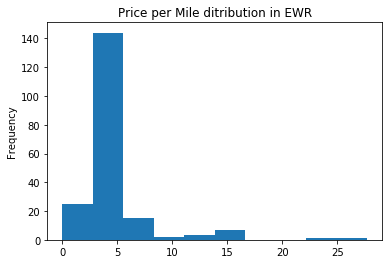

In [37]:
#EWR
print("EWR")
EWR = CRQ1[CRQ1['Borough'].isin(["EWR"])]
print("Mean: ", EWR["price_per_mile"].mean())
print("Standard deviation: ",EWR["price_per_mile"].std())
EWR['price_per_mile'].plot(kind='hist', title="Price per Mile ditribution in EWR")

Brooklyn
Mean:  4.945656956213727
Standard deviation:  1.7540498934767979


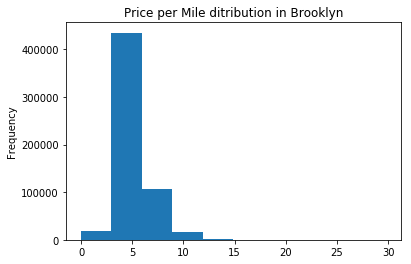

In [38]:
# Brooklyn
print("Brooklyn")
Brooklyn = CRQ1[CRQ1['Borough'].isin(["Brooklyn"])]
print("Mean: ", Brooklyn["price_per_mile"].mean())
print("Standard deviation: ",Brooklyn["price_per_mile"].std())
Brooklyn['price_per_mile'].plot(kind='hist', title="Price per Mile ditribution in Brooklyn")

Looking at the data previously exposed we can notice that the mean of the price per mile of the taxis that were taken in Manhattan (remember, that the categorization of the borough it is given by PULocationID), is notoriously higher than the other ones.

One possible explanation is that, probably, in Manhattan the traffic is greater than in the other boroughs and therefore the time spent in the taxi, thus increasing the price per mile.

On the other hand, if we look at the standard deviation, we see that they are all close to 2, except EWR, and this makes sense because the rate to go to EWR has more restrictions, is calculated differently and also depends on the time of the day in which the taxi is used, unlike the other boroughs. 

Finally, with respect to the distributions, they all have an accentuated pick, which makes sense, since one would tend to think that the rate per mile should converge at a quasi-fixed rate.

We can also see that the boroughs that are further away from Manhattan as Staten Island or EWR, have extreme values, which are closer to higher prices per mile, which could be explained that having a longer trip, variables such as traffic or other setbacks that affect time spent inside the taxi, are more likely to occur than on shorter trips.

Following, it exposed, the data corresponding to the t-test among all the possible pairs of distribution of different boroughs.

In [41]:
# Again, I'm sure it is more efficient way to compute this :/
# Find all the possible pairs of different boroughs
Borough = ['Bronx', 'Brooklyn', "EWR", "Manhattan", "Queens", "Staten Island"]
Borough_perm = list(combinations(Borough, 2))
for i in Borough_perm:
    print(i)

('Bronx', 'Brooklyn')
('Bronx', 'EWR')
('Bronx', 'Manhattan')
('Bronx', 'Queens')
('Bronx', 'Staten Island')
('Brooklyn', 'EWR')
('Brooklyn', 'Manhattan')
('Brooklyn', 'Queens')
('Brooklyn', 'Staten Island')
('EWR', 'Manhattan')
('EWR', 'Queens')
('EWR', 'Staten Island')
('Manhattan', 'Queens')
('Manhattan', 'Staten Island')
('Queens', 'Staten Island')


In [42]:
# Select only the variable of interest for each borough
Manhattan = Manhattan['price_per_mile']
Bronx = Bronx['price_per_mile']
Brooklyn = Brooklyn['price_per_mile']
EWR = EWR['price_per_mile']
Queens = Queens['price_per_mile']
Staten_Island = Staten_Island['price_per_mile']

In [43]:
# Compute all t-test
alpha = 0.05

print("Bronx & Brooklyn")
stat, p = ttest_ind(Bronx, Brooklyn)
print('Statistics=%.3f, p=%.3f' % (stat, p))
if p > alpha:
    print('Same distributions (fail to reject H0)')
    print(" ")
else:
    print('Different distributions (reject H0)')
    print(" ")
    
print("Bronx & EWR")
stat, p = ttest_ind(Bronx, EWR)
print('Statistics=%.3f, p=%.3f' % (stat, p))
if p > alpha:
    print('Same distributions (fail to reject H0)')
    print(" ")
else:
    print('Different distributions (reject H0)')
    print(" ")

print("Bronx & Manhattan")
stat, p = ttest_ind(Bronx, Manhattan)
print('Statistics=%.3f, p=%.3f' % (stat, p))
if p > alpha:
    print('Same distributions (fail to reject H0)')
    print(" ")
else:
    print('Different distributions (reject H0)')
    print(" ")
    
print("Bronx & Queens")
stat, p = ttest_ind(Bronx, Queens)
print('Statistics=%.3f, p=%.3f' % (stat, p))
if p > alpha:
    print('Same distributions (fail to reject H0)')
    print(" ")
else:
    print('Different distributions (reject H0)')
    print(" ")

print("Bronx & Staten Island")
stat, p = ttest_ind(Bronx, Staten_Island)
print('Statistics=%.3f, p=%.3f' % (stat, p))
if p > alpha:
    print('Same distributions (fail to reject H0)')
    print(" ")
else:
    print('Different distributions (reject H0)')
    print(" ")
    
print("Brooklyn & EWR")
stat, p = ttest_ind(Brooklyn, EWR)
print('Statistics=%.3f, p=%.3f' % (stat, p))
if p > alpha:
    print('Same distributions (fail to reject H0)')
    print(" ")
else:
    print('Different distributions (reject H0)')
    print(" ")
    
print("Brooklyn & Manhattan")
stat, p = ttest_ind(Brooklyn, Manhattan)
print('Statistics=%.3f, p=%.3f' % (stat, p))
if p > alpha:
    print('Same distributions (fail to reject H0)')
    print(" ")
else:
    print('Different distributions (reject H0)')
    print(" ")
    
print("Brooklyn & Queens")
stat, p = ttest_ind(Brooklyn, Queens)
print('Statistics=%.3f, p=%.3f' % (stat, p))
if p > alpha:
    print('Same distributions (fail to reject H0)')
    print(" ")
else:
    print('Different distributions (reject H0)')
    print(" ")

print("Brooklyn & Staten Island")
stat, p = ttest_ind(Brooklyn, Staten_Island)
print('Statistics=%.3f, p=%.3f' % (stat, p))
if p > alpha:
    print('Same distributions (fail to reject H0)')
    print(" ")
else:
    print('Different distributions (reject H0)')
    print(" ")

print("EWR & Manhattan")
stat, p = ttest_ind(EWR, Manhattan)
print('Statistics=%.3f, p=%.3f' % (stat, p))
if p > alpha:
    print('Same distributions (fail to reject H0)')
    print(" ")
else:
    print('Different distributions (reject H0)')
    print(" ")

print("EWR & Queens")
stat, p = ttest_ind(EWR, Queens)
print('Statistics=%.3f, p=%.3f' % (stat, p))
if p > alpha:
    print('Same distributions (fail to reject H0)')
    print(" ")
else:
    print('Different distributions (reject H0)')
    print(" ")
    
print("EWR & Staten Island")
stat, p = ttest_ind(EWR, Staten_Island)
print('Statistics=%.3f, p=%.3f' % (stat, p))
if p > alpha:
    print('Same distributions (fail to reject H0)')
    print(" ")
else:
    print('Different distributions (reject H0)')
    print(" ")

print("Manhattan & Queens")
stat, p = ttest_ind(Manhattan, Queens)
print('Statistics=%.3f, p=%.3f' % (stat, p))
if p > alpha:
    print('Same distributions (fail to reject H0)')
    print(" ")
else:
    print('Different distributions (reject H0)')
    print(" ")

print("Manhattan & Staten Island")
stat, p = ttest_ind(Manhattan, Staten_Island)
print('Statistics=%.3f, p=%.3f' % (stat, p))
if p > alpha:
    print('Same distributions (fail to reject H0)')
    print(" ")
else:
    print('Different distributions (reject H0)')
    print(" ")

print("Queens & Staten Island")
stat, p = ttest_ind(Queens, Staten_Island)
print('Statistics=%.3f, p=%.3f' % (stat, p))
if p > alpha:
    print('Same distributions (fail to reject H0)')
    print(" ")
else:
    print('Different distributions (reject H0)')
    print(" ")

Bronx & Brooklyn
Statistics=-21.936, p=0.000
Different distributions (reject H0)
 
Bronx & EWR
Statistics=1.524, p=0.127
Same distributions (fail to reject H0)
 
Bronx & Manhattan
Statistics=-124.950, p=0.000
Different distributions (reject H0)
 
Bronx & Queens
Statistics=203.669, p=0.000
Different distributions (reject H0)
 
Bronx & Staten Island
Statistics=6.762, p=0.000
Different distributions (reject H0)
 
Brooklyn & EWR
Statistics=3.160, p=0.002
Different distributions (reject H0)
 
Brooklyn & Manhattan
Statistics=-379.371, p=0.000
Different distributions (reject H0)
 
Brooklyn & Queens
Statistics=729.310, p=0.000
Different distributions (reject H0)
 
Brooklyn & Staten Island
Statistics=9.428, p=0.000
Different distributions (reject H0)
 
EWR & Manhattan
Statistics=-9.634, p=0.000
Different distributions (reject H0)
 
EWR & Queens
Statistics=11.531, p=0.000
Different distributions (reject H0)
 
EWR & Staten Island
Statistics=1.723, p=0.085
Same distributions (fail to reject H0)
 


Let's recap briefly what the results we just computed mean:

1. Implicit assumptions that we are making:
   - The data samples are independent
   - The data samples distribute Normal


2. The null hypothesis in this case is that the means of the two boroughs tested are equal. A rejection of this hypothesis indicates that there is sufficient evidence that the means are different, therefore the distributions are not equal.
   - Fail to Reject H0: Sample distributions are equal.
   - Reject H0: Sample distributions are not equal.


3. The interpretation of the statistic finds that the sample means are different, with a significance of at least 5%.

In light of the results we can you say that are statistically significant differences, on the averages, among zones in almost every pair except for Bronx & EWR and Staten Island & EWR.

These results are not very intuitive, because as we said before it would tend to think that the price per mile would tend to converge to a fixed price independent of the neighborhood, perhaps except for the case of EWR that has a slightly different pricing method.

Possible explanations for these differences:
- The traffic and therefore the duration of the trip affects considerably the price per mile.
- The data samples are not independent, in this case, it could be a preference for neighborhoods or events that happen in New York, which do not affect everyone equally.
- The data samples do not distribute normal, in the histograms we saw that despite having a single pick just like the Normal the right tail tends to be longer in all boroughs, than the one on the left, which is otherwise fixed, by the nature of the variable, at zero. 

Coming up next we will proceed to compute our new variable: price per mile 2.0, that takes in account the trip duration, hoping that this mitigates the effect of traffic on the price per mile previously calculated.

For computing this variable, we are going to use the ratio between the price_per_mile and the Trip Duration Num, that in our case is a variable that we compute in a previous exercise, which corresponds to the total seconds of the trip, represented by an integer.

In [45]:
CRQ1["price_per_mile_2.0"] = CRQ1["price_per_mile"] / CRQ1['Trip Duration Num']

In [46]:
CRQ1.describe()

,fare_amount,trip_distance,Trip Duration Num,price_per_mile,price_per_mile_2.0
count,4.478703e+07,4.478703e+07,4.478703e+07,4.478703e+07,4.478703e+07
mean,1.290833e+01,2.980749e+00,8.642178e+02,5.841809e+00,1.255993e-02
std,1.098907e+01,3.778111e+00,6.953072e+02,2.186231e+00,1.302129e-02
min,1.000000e-02,3.200000e-01,6.100000e+01,6.697924e-05,7.093160e-09
25%,6.500000e+00,1.000000e+00,4.060000e+02,4.308511e+00,4.432624e-03
50%,9.500000e+00,1.660000e+00,6.690000e+02,5.462185e+00,8.453726e-03
75%,1.450000e+01,3.070000e+00,1.092000e+03,6.896552e+00,1.577643e-02
max,1.020500e+03,1.061200e+03,1.439300e+04,3.000000e+01,4.609375e-01


It looks normal this time, so we are going to proceed to compute the mean, standard deviation and histogram of the distribution, in that order, for each borough, for our new variable price_per_mile_2.0

Manhattan
Mean:  0.013212512605485229
Standard deviation:  0.013091611282191115


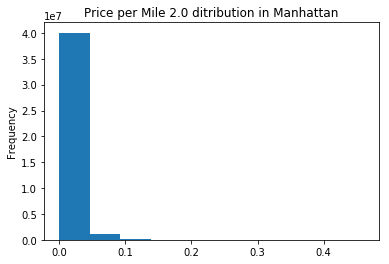

In [47]:
# If I had done the for loop before, this would be much more direct :/
# Manhattan
print("Manhattan")
Manhattan = CRQ1[CRQ1['Borough'].isin(["Manhattan"])]
print("Mean: ", Manhattan["price_per_mile_2.0"].mean())
print("Standard deviation: ", Manhattan["price_per_mile_2.0"].std())
Manhattan['price_per_mile_2.0'].plot(kind='hist', title="Price per Mile 2.0 ditribution in Manhattan")

Bronx
Mean:  0.009030416361289734
Standard deviation:  0.012172088639718973


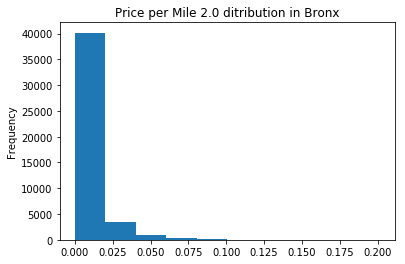

In [48]:
# Bronx
print("Bronx")
Bronx = CRQ1[CRQ1['Borough'].isin(["Bronx"])]
print("Mean: ",Bronx["price_per_mile_2.0"].mean())
print("Standard deviation: ", Bronx["price_per_mile_2.0"].std())
Bronx['price_per_mile_2.0'].plot(kind='hist', title="Price per Mile 2.0 ditribution in Bronx")

Staten Island
Mean:  0.007371396338425366
Standard deviation:  0.01293776522026739


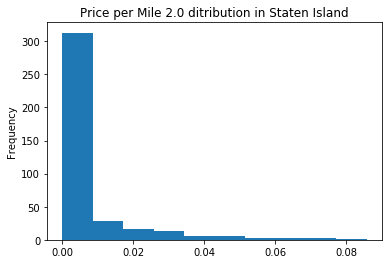

In [57]:
# Staten Island
print("Staten Island")
Staten_Island = CRQ1[CRQ1['Borough'].isin(["Staten Island"])]
print("Mean: ", Staten_Island["price_per_mile_2.0"].mean())
print("Standard deviation: ",Staten_Island["price_per_mile_2.0"].std())
Staten_Island['price_per_mile_2.0'].plot(kind='hist', title="Price per Mile 2.0 ditribution in Staten Island")

Queens
Mean:  0.003478326444858839
Standard deviation:  0.0074819869703472265


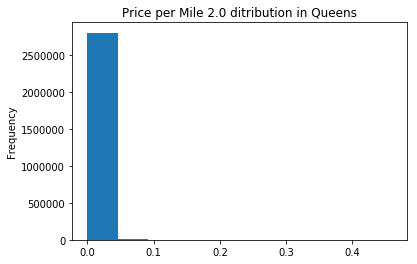

In [51]:
# Queens
print("Queens")
Queens = CRQ1[CRQ1['Borough'].isin(["Queens"])]
print("Mean: ", Queens["price_per_mile_2.0"].mean())
print("Standard deviation: ",Queens["price_per_mile_2.0"].std())
Queens['price_per_mile_2.0'].plot(kind='hist', title="Price per Mile 2.0 ditribution in Queens")

EWR
Mean:  0.014509887615676733
Standard deviation:  0.03500081336591886


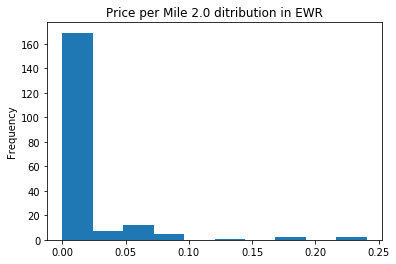

In [52]:
#EWR
print("EWR")
EWR = CRQ1[CRQ1['Borough'].isin(["EWR"])]
print("Mean: ", EWR["price_per_mile_2.0"].mean())
print("Standard deviation: ",EWR["price_per_mile_2.0"].std())
EWR['price_per_mile_2.0'].plot(kind='hist', title="Price per Mile 2.0 ditribution in EWR")

Brooklyn
Mean:  0.010423102552110585
Standard deviation:  0.01245303919394363


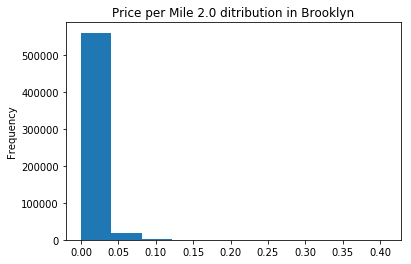

In [53]:
# Brooklyn
print("Brooklyn")
Brooklyn = CRQ1[CRQ1['Borough'].isin(["Brooklyn"])]
print("Mean: ", Brooklyn["price_per_mile_2.0"].mean())
print("Standard deviation: ",Brooklyn["price_per_mile_2.0"].std())
Brooklyn['price_per_mile_2.0'].plot(kind='hist', title="Price per Mile 2.0 ditribution in Brooklyn")

Now we can see that the standard deviations of all boroughs decreased a lot. The EWR remains high with respect to other boroughs, but decreased from 3.46 to 0.035.
This means that as we have mentioned before, the price per mile tends to converge an almost unique value per mile, but, we still have outsiders, which we have not discarded that are due to errors in the data and also we can notice that Manhattan and EWR means are still higher than others. 

Following, it exposed, the data corresponding to the t-test among all the possible pairs of distribution of different boroughs.

In [55]:
# Select only the variable of interest for each borough
Manhattan = Manhattan['price_per_mile_2.0']
Bronx = Bronx['price_per_mile_2.0']
Brooklyn = Brooklyn['price_per_mile_2.0']
EWR = EWR['price_per_mile_2.0']
Queens = Queens['price_per_mile_2.0']
Staten_Island = Staten_Island['price_per_mile_2.0']

Taking into account that we are still under the same assumptions, described above for the variable price_per_mile, we have statistically significant differences, on the averages, among zones, for every case, except Mahattan & EWR. Which would mean that taxis are more expensive for those who live in Manhattan and cheaper for those who live in Queens. 

Comparing price per mile and price per mile 2.0, we could say that in this case the variables are more concentrated, which makes sense, since it would be expected that at least, per zone, the price per mile is the same.

The differences between zones, on the other hand, could be due to:
- The effect of the initial charge affecting differently short and long trips
- The cost of the tolls
- The 50 cent State Surcharge
- Demand for taxis of the time of day, by boroughs
- Other external variables that we are not able to identify

#### CRQ2. Visualize Taxis movements! NYC is divided in many Taxis zones. For each yellow cab trip we know the zone the Taxi pick up and drop off the users. Let's visualize, on a chropleth map, the number of trips that starts in each zone. Than, do another map to count the races that end up in the single zone. Comment your discoveries. To perform this task we use the library folium. You find some examples of chorophlet maps here and here. The Geojson we use to trace the zones is taxi_zones.json in the Homework's repository.